In [1]:
import sys
sys.path.append('..')
%matplotlib inline

#Comparing measures
We will here generate a graph comparing different measure, for the same single simulation.

First, we create or load a database, define the configuration of the experiment, and create it or get it from the database, if it exists.

In [2]:
from lib import ngdb

In [3]:
db=ngdb.NamingGamesDB("graph1.db")

In [4]:
xp_cfg={
    'pop_cfg':{
        'voc_cfg':{
            'voc_type':'sparse_matrix',
            'M':10,
            'W':10
            },
        'strat_cfg':{
            'strat_type':'naive'
            },
        'nbagent':10
        },
    'step':10
}

Tmax = 1000

testexp=db.get_experiment(**xp_cfg)

We run the experiment until *Tmax*.

In [5]:
testexp.continue_exp_until(Tmax)

We get the graph object corresponding to the *Theoretical Success* measure (as defined in the module ngmeth) of our experiment, and plot it. We then do the same for other measures.

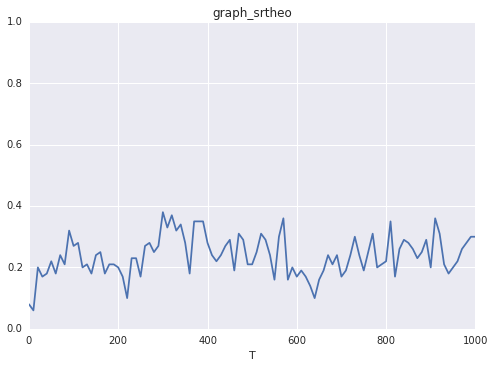

In [6]:
graph1=testexp.graph("srtheo")
graph1.show()

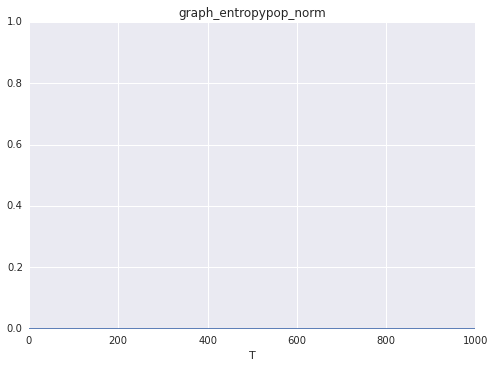

In [7]:
graph2 = testexp.graph("entropypop_norm")
graph2.show()

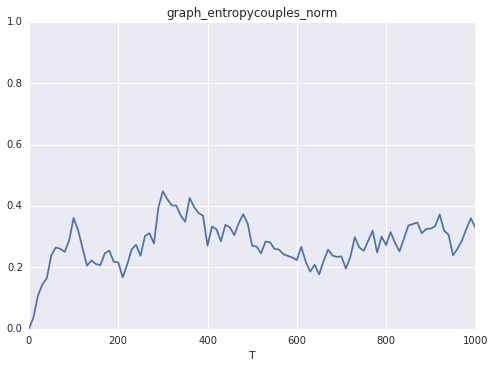

In [8]:
graph3 = testexp.graph("entropycouples_norm")
graph3.show()

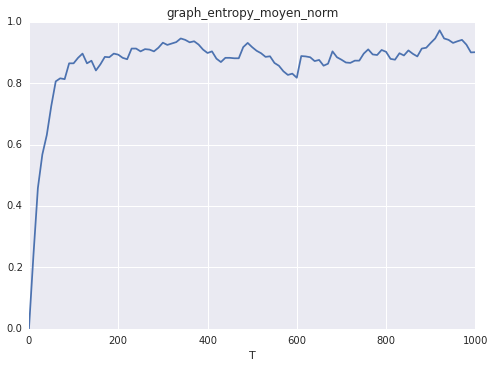

In [9]:
graph4 = testexp.graph("entropy_moyen_norm")
graph4.show()

Here we combine all the measures in one graph.

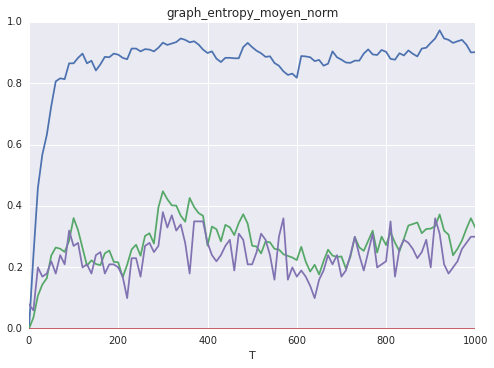

In [10]:
import copy
graph=copy.deepcopy(graph4)

graph.add_graph(graph3)
graph.add_graph(graph2)
graph.add_graph(graph1)
graph.show()

Eventually, adding details to generate the graph as used in the paper.

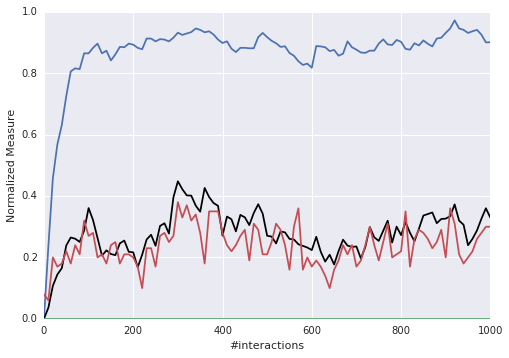

In [11]:
graph.title = ''
graph.xlabel = '#interactions'
graph.ylabel = 'Normalized Measure'

graph.Yoptions[0] = {'label':'Info. agent'}
graph.Yoptions[1] = {'label':'Info. couple', 'color':'black'}
graph.Yoptions[2] = {'label':'Info. population'}
graph.Yoptions[3] = {'label':'Theoretical Success'}

graph.legendoptions['bbox_to_anchor'] = (0,0,0.4,0.8)

graph.show()

Comparison of different measures of convergence, normalized, for
one simulation with the naive strategy (M =W =N =10). Time unit is one
speaker/hearer interaction. Blue: Average acquired information per agent,
Black: Average acquired information per couple of agents, Green: Acquired
information at population level, Red: Theoretical success. The black one
describes the best the state of the population (starts at 0, low noise, dynamics
almost linear towards globally converged state)

###Going beyond

What about averaging the measures on several simulations?

In [12]:
measures = ['entropy_moyen_norm', 'entropycouples_norm', 'entropypop_norm', 'srtheo']
nb_iter = 10
graph_list=[]
for i in range(nb_iter):
    graph_list.append([])
uuid_list=[]

Getting the different graphs

In [13]:
for i in range(nb_iter):
    testexp=db.get_experiment(blacklist=uuid_list, **xp_cfg)
    uuid_list.append(testexp.uuid)
    testexp.continue_exp_until(Tmax)
    for j in range(len(measures)):
        graph_list[i].append(testexp.graph(measures[j]))

Combining them

In [14]:
for j in range(len(measures)):
    for i in range(nb_iter):
        graph_list[0][j].add_graph(graph_list[i][j])
        graph_list[0][j].merge()

graph_final = graph_list[0][0]
        
for j in range(1,len(measures)):
    graph_final.add_graph(graph_list[0][j])

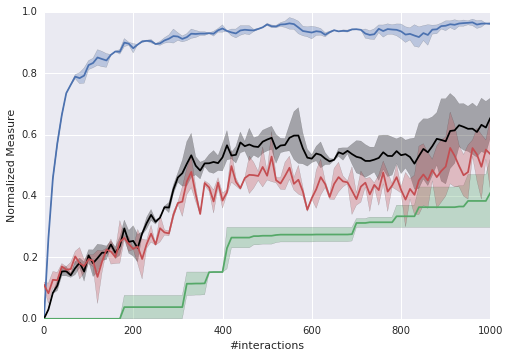

In [15]:
graph_final.title = ''
graph_final.xlabel = '#interactions'
graph_final.ylabel = 'Normalized Measure'

graph_final.Yoptions[0] = {'label':'Info. agent'}
graph_final.Yoptions[1] = {'label':'Info. couple', 'color':'black'}
graph_final.Yoptions[2] = {'label':'Info. population'}
graph_final.Yoptions[3] = {'label':'Theoretical Success'}

graph_final.legendoptions['bbox_to_anchor'] = (0,0,0.4,0.8)

graph_final.show()